# Introduction to matplotlib

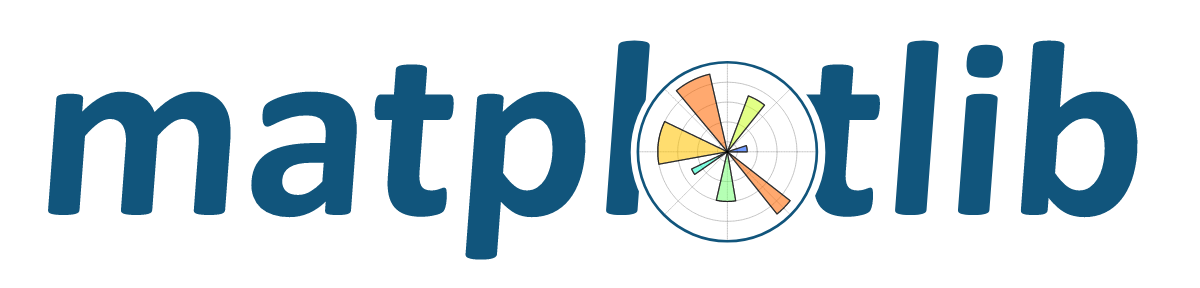

[Matplotlib](https://matplotlib.org/) is a powerful and very popular data visualization library in Python.

* Matplotlib was originally written by John D. Hunter in 2003.
* It is a cross-platform library for making plots and can be used in Python and IPython shells, Jupyter notebook and web application servers.
* Matplotlib has a procedural interface named the Pylab, which is designed to resemble MATLAB (in fact, Matplotlib along with NumPy can be considered as the open source equivalent of MATLAB).

**Install matplotlib**: 
* *pip install matplotlib*
* *conda install matplotlib*

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(mpl.__version__)

3.3.4


## Matplotlib architecture

Matplotlib architecture is composed of 3 main layers:

1. **The backend layer**: 
  * https://matplotlib.org/stable/api/backend_bases_api.html# 
  * has three main built-in abstract interface classes: 
    * FigureCanvas: the area where the figure is drawn
    * Renderer: knows how to draw on the FigureCanvas
    * Event: handles user inputs 


2. **The artist layer**:
  * https://matplotlib.org/stable/api/artist_api.html
  * knows how to use the Renderer to draw on the Canvas
  * Artist objects can be Primitive (Line2D, Rectangle, Circle, Text) or Composite (Axis, Tick, Axes, Figure)
  * Each composite artist may contain other composite artists and primitive artists.
  

3. **The scripting layer**:
  * https://matplotlib.org/stable/api/pyplot_summary.html
  * comprised mainly  of the scripting interface pyplot

### Artist Layer

In [3]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas 
from matplotlib.figure import Figure # import Figure Artist

fig = Figure()
canvas = FigureCanvas(fig)

#create 10000 random numbers
x = np.random.randn(10000)

ax = fig.add_subplot(111) # create an axes artist; 111 is from matlab convention (grid with 1 row and 1 column, using first cell in that grid for the location of the new axes)

ax.hist(x, 100) # generate a histogram of the 10k numbers

ax.set_title("Normal distribution with $\mu=0, \sigma=1$")
fig.savefig('matplotlib_hist.png')

### Scripting Layer

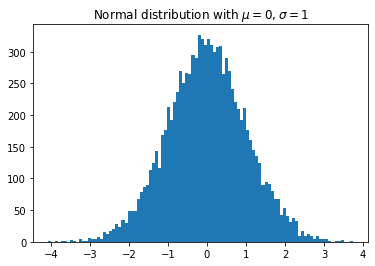

In [5]:
#import matplotlib.pyplot as plt

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
#plt.savefig("matplotlib_hist_2.png")
plt.show()

## Matplotlib Object Hierarchy

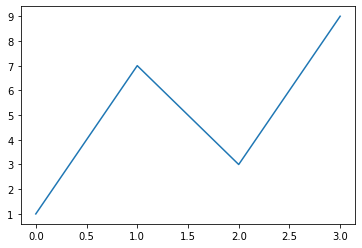

In [6]:
# a simple plot
plt.plot([1,7,3,9])

In fact, a **plot** is a hierarchy of nested Python objects:
* a **Figure** object is the outermost container for a matplotlib graphic (https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure)
* a Figure can contain one or more **Axes** objects, which are the individual plots (https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes)
* tick marks, individual lines, legends, text boxes

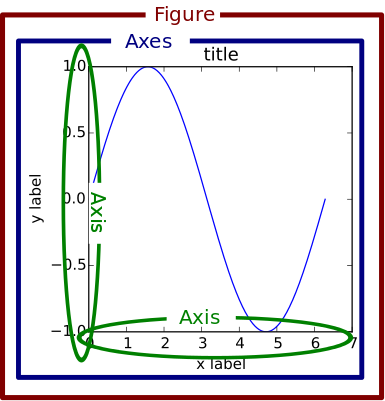

https://realpython.com/python-matplotlib-guide

### Parts of a Figure

<img src="Figure.png" width="700" height = "500" />

https://matplotlib.org/stable/tutorials/introductory/quick_start.html

### Figure

* Represents the whole figure
* https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure
* a **Figure** object is the outermost container for a matplotlib graphic 
* The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and nested subfigures

matplotlib.figure.Figure

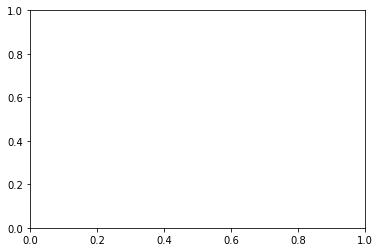

In [7]:
fig, _ = plt.subplots() # default call: subplots(nrows=1, ncols=1)
type(fig) # fig is a Figure class instance

<Figure size 432x288 with 0 Axes>

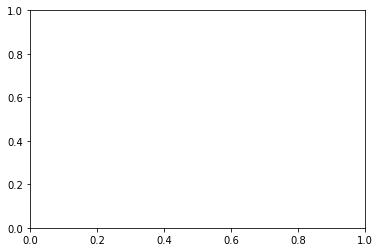

In [9]:
# Example from matplotlib documentation
fig = plt.figure()  # an empty figure with no Axes

# a figure with a single Axes
fig, ax = plt.subplots() 


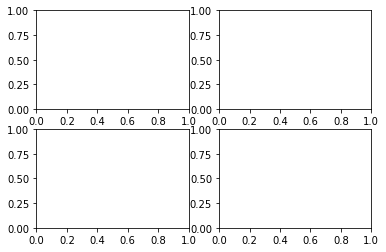

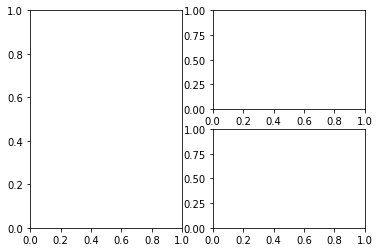

In [2]:

# a figure with a 2x2 grid of Axes
fig, axs = plt.subplots(2, 2)  

# a figure with one axes on the left, and two on the right
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom']])

### Axes

* The actual plots
* https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes
* *An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes.*  
* Each Axes has a **title**: *set_title()*, an **x-label**: *set_xlabel()*, and a **y-label**: *set_ylabel()*

matplotlib.axes._subplots.AxesSubplot

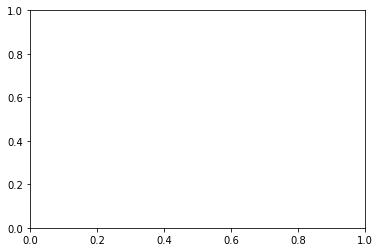

In [8]:
fig, ax = plt.subplots() # default call: subplots(nrows=1, ncols=1)
type(ax)

### Axis

* https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis
* *These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks).** 

### An example

(2000.0, 2049.0)

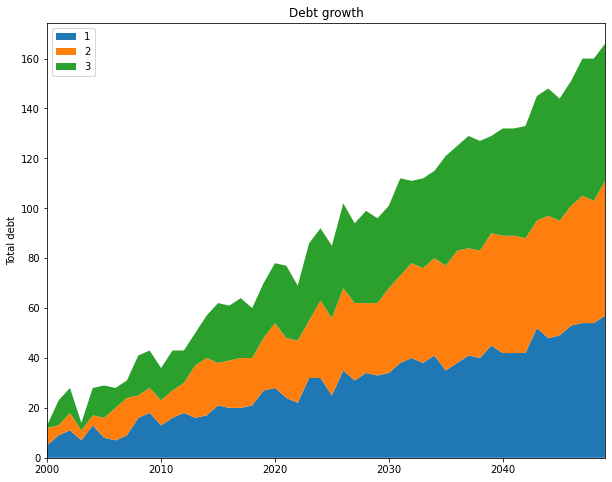

In [12]:
# create random time series and plot them using fig and ax
a = np.arange(50) # Returns array [0, 1, ...49]
b = np.random.randint(0, 10, size=(3, a.size))
yrs = 2000 + a

fig, ax = plt.subplots(figsize=(10, 8))
ax.stackplot(yrs, a+b, labels=['1', '2', '3'])
ax.set_title('Debt growth')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

## Basic plotting

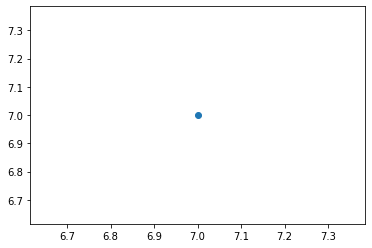

In [13]:
plt.plot(7, 7, 'o')
plt.show() # figures can not be changed once rendered

We can add some labels...

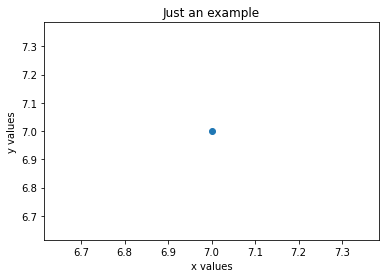

In [11]:
plt.plot(7, 7, 'o')

plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Just an example')

plt.show()

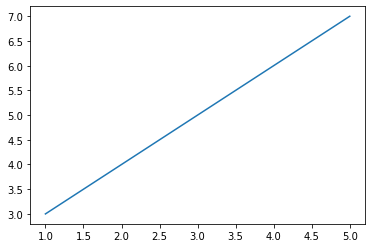

In [12]:
# To draw a line from point (1,3) to point (5,7) we need to pass 2 arrays as follows:
xpoints = np.array([1, 5])
ypoints = np.array([3, 7])

plt.plot(xpoints, ypoints)
plt.show()

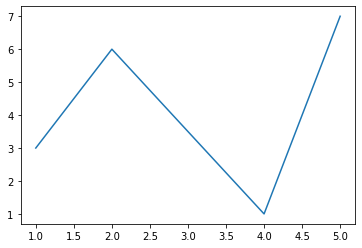

In [13]:
# multiple points
xpoints = np.array([1, 2, 4, 5])
ypoints = np.array([3, 6, 1, 7])

plt.plot(xpoints, ypoints)
plt.show()

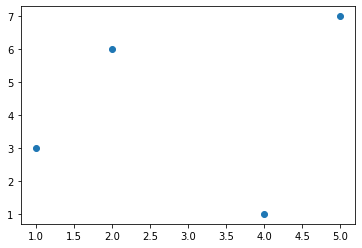

In [14]:
# draw them as points 
plt.plot(xpoints, ypoints, 'o')
plt.show()

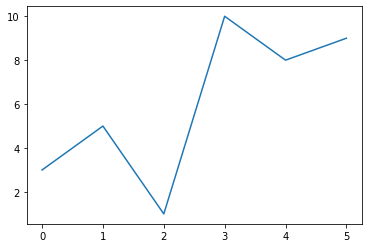

In [15]:
# default x values = [0,1,2,3,...]
ypoints = np.array([3, 5, 1, 10, 8, 9])

plt.plot(ypoints)
plt.show()

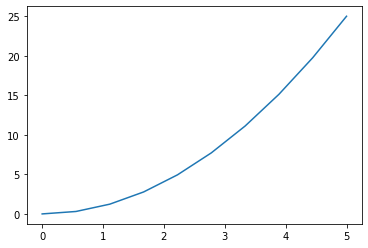

In [15]:
x = np.linspace(0,5,10) # Returns 10 evenly spaced samples, calculated over the interval [0, 5].
y = x**2
plt.plot(x, y)
#plt.show()

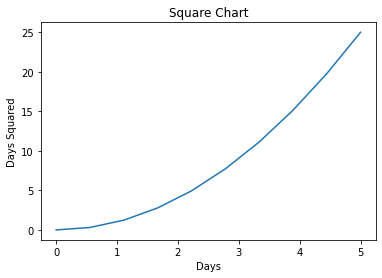

In [17]:
plt.plot(x, y)
plt.title("Square Chart")
plt.xlabel('Days')
plt.ylabel('Days Squared')
plt.show()

### Marker reference
Many possible markers available:
https://matplotlib.org/stable/api/markers_api.html

<img src="markers.png" width="300" height = "300" />

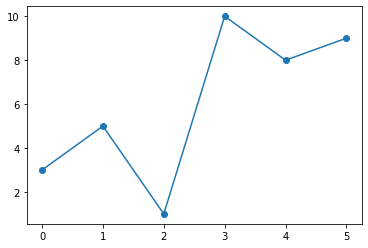

In [18]:
# use marker
plt.plot(ypoints, marker='o')
plt.show()

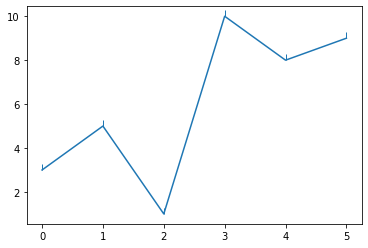

In [19]:
plt.plot(ypoints, marker=mpl.markers.TICKUP)
plt.show()

## Multiple Plots

The subplot() function handles creating the Axes objects.

* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
* Allows you to draw multiple plots in one figure.
* The layout is organized in rows and columns (the first and second argument).

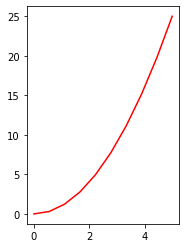

In [20]:
#The third argument represents the index of the current plot.
plt.subplot(1,2,1)
plt.plot(x, y, 'r')

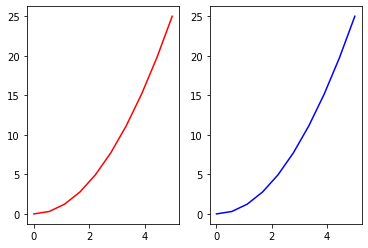

In [16]:
# Define the row and column to print the plot with a number assigned to the plot

#plot 1:
plt.subplot(1,2,1)
plt.plot(x, y, 'r')

#plot 2:
plt.subplot(1,2,2)
plt.plot(x, y, 'b')

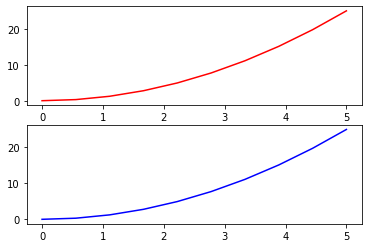

In [22]:
#plot 1:
plt.subplot(2, 1, 1)
plt.plot(x, y, 'r')

#plot 2:
plt.subplot(2, 1, 2)
plt.plot(x, y, 'b')

plt.show()

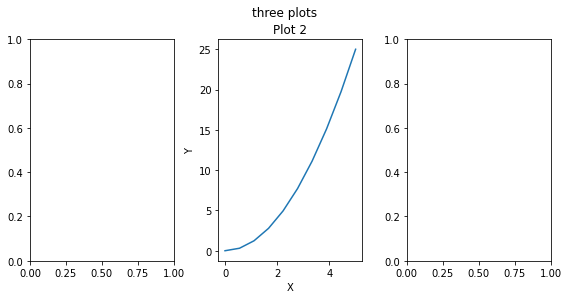

In [18]:
# You can also define multiple plots with subplots 
# ax is now a list of axes objects
fig, ax = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
fig.suptitle("three plots")
plt.tight_layout()
ax[1].set_title('Plot 2')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].plot(x, y)

**<p style="color:red">EXERCISE 1</p>**

**Create a figure with 6 plots arranged in 3 rows and 2 columns. Provide 2 solutions: one with plt.subplot and the other with plt.subplots.**
* The first 2 plots show the linear function x in two colours: black and red.
* The next 2 plots show the sin(x) function in two colours: yellow and dark blue.
* The last 2 plots show the ln(x) function in two colours: green and blue.
* x should take values from 1 to 100.

In [24]:
# Your solution here...



***

## Using Figure Objects

* https://matplotlib.org/stable/api/figure_api.html
* **add_axes** takes as first argument a 'rect' tuple (left, bottom, width, height)
* *The dimensions (left, bottom, width, height) of the new Axes. All quantities are in fractions of figure width and height.*

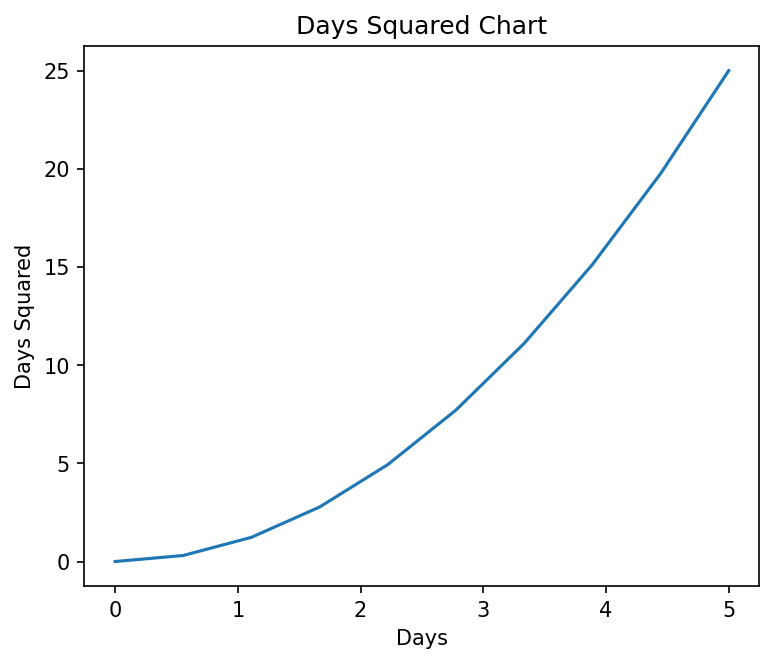

In [25]:
x = np.linspace(0,5,10) # Returns 10 evenly spaced samples, calculated over the interval [0, 5].
y = x**2

# Define width & height in inches
# Dots per inch (default: 100.0)
fig = plt.figure(figsize=(5,4), dpi=150)

# Adds axes with a left, bottom, width and height that ranges from 0 to 1
# which is the percent of the canvas you want to use
ax = fig.add_axes([0.1,0.1,0.9,0.9])

# Set lables and title
ax.set_xlabel('Days')
ax.set_ylabel('Days Squared')
ax.set_title('Days Squared Chart')
ax.plot(x,y,label='x / x²')
#plt.show()

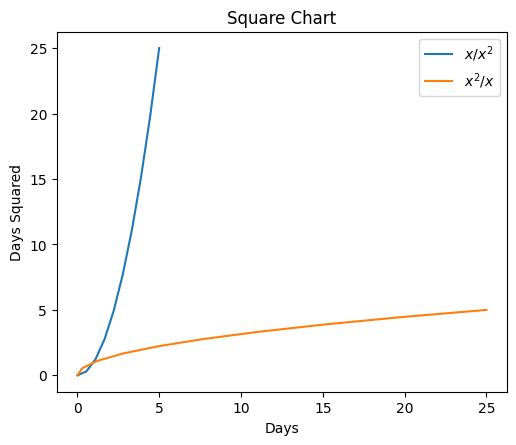

In [26]:
fig = plt.figure(figsize=(5,4), dpi=100)
# Adds axes with a left, bottom, width and height that ranges from 0 to 1
# which is the percent of the canvas you want to use
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.set_xlabel('Days')
ax.set_ylabel('Days Squared')
ax.set_title('Square Chart')
ax.plot(x, y, label=r'$x/x^2$')

# You can plot to plots using the same axes
ax.plot(y, x, label=r'$x^2/x$')
# Add the optional legend with a location number (best: 0, upper right: 1, upper left: 2, lower left: 3, lower right: 4)
ax.legend(loc=0)
plt.show()

Text(0, 35, 'Message')

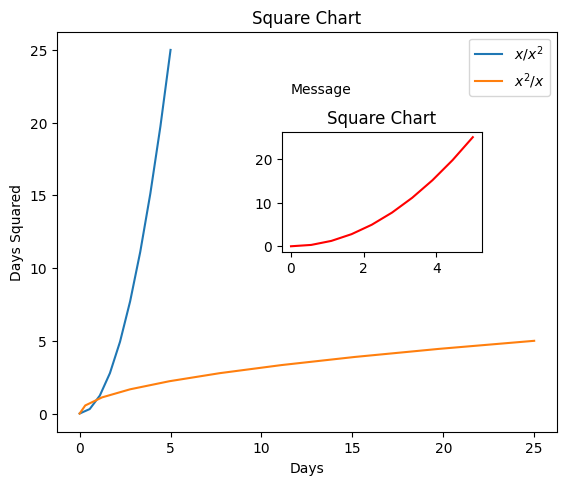

In [27]:
# You can create axis inside of others
fig = plt.figure(figsize=(5,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Days')
ax.set_ylabel('Days Squared')
ax.set_title('Square Chart')
ax.plot(x, y, label=r'$x/x^2$')
ax.plot(y, x, label=r'$x^2/x$')
ax.legend(loc=0)

ax2 = fig.add_axes([0.45, 0.45, 0.4, 0.3])
ax2.set_title('Square Chart')
ax2.plot(x, y, color='r')

# Add text to plot from central point of 0,0
ax2.text(0,35,"Message")

## Appearance Options

**Default colors**

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta,
* y: yellow
* k: black
* w: white


**Hexcodes** 

* ex. color="#eeefff"**

**Color names** 

* ex. color="burlywood" 
* https://en.wikipedia.org/wiki/Web_colors

**Line styles**
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
* There are many line styles - check out matplotlib references.

**Markers**
* https://matplotlib.org/stable/api/markers_api.html
* Can mark certain points on the graph.

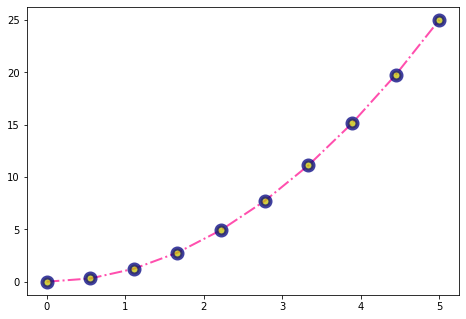

In [28]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

# color="0.75" creates a 75% gray
# alpha defines the percentage of opacity
# lw: The default line width is 1, so to double it put in 2 and so forth
# ls: You can also provide a sample like '-.'
# markerfacecolor changes the marker fill color
# markeredgecolor changes the marker stroke color
# markeredgewidth changes the markers stroke size
ax.plot(x, y, color='DeepPink', alpha=0.75, lw=2, ls='-.', marker="o", markersize=10, markerfacecolor='y', markeredgecolor='navy', markeredgewidth=4)

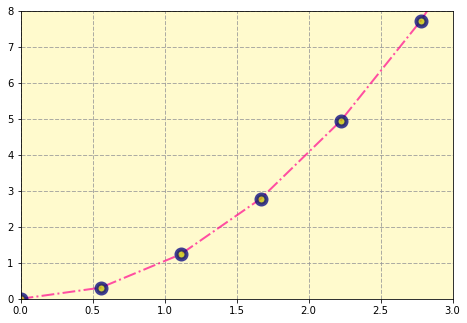

In [29]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y, color='DeepPink', alpha=0.75, lw=2, ls='-.', marker="o", markersize=10, markerfacecolor='y', markeredgecolor='navy', markeredgewidth=4)

# Set the lower and upper bound of x & y axis
ax.set_xlim([0,3])
ax.set_ylim([0,8])
# Add grid, color, dashes - on/off sequence, 5pts sperated by 2pts off
ax.grid(True, color='0.6', dashes=(5,2)) 
ax.set_facecolor('#FFFACD')

### Save Plots to Files

In [30]:
fig.savefig('nice_plot.png')

## Line Plots

* A line chart or line plot is a type of plot which displays information as a series of data points connected by straight line segments. 
* It is one of the most basic type of chart and is common in many fields not just data science. 

*When to use line plots?*
* Continuous datasets
* Trend-based visualizations of data over a period of time

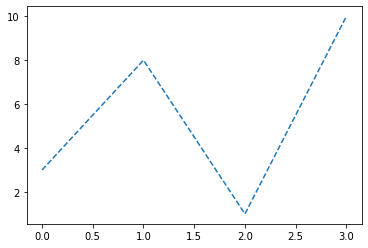

In [31]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = 'dashed')
plt.show()

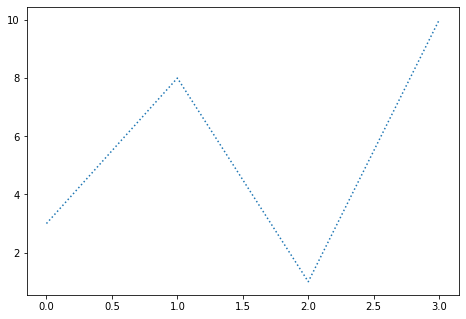

In [32]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1,0.1,1,1])

ax.plot(ypoints, linestyle = 'dotted')
plt.show()

**Line style**

* *linestyle* can be written as **ls**

* *dotted* can be written as **:**

* *dashed* can be written as **--**

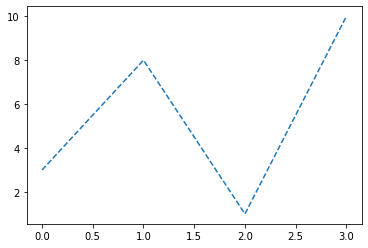

In [33]:
plt.plot(ypoints, ls='--')
plt.show()

**Line color**

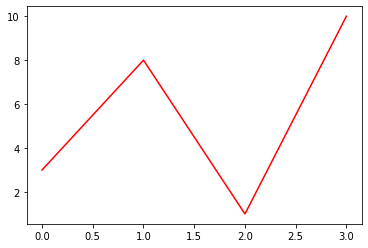

In [34]:
plt.plot(ypoints, color = 'r')
plt.show()

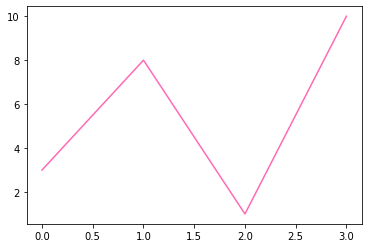

In [35]:
plt.plot(ypoints, c = 'hotpink')
plt.show()

**Line width**

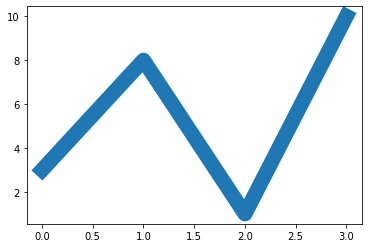

In [36]:
plt.plot(ypoints, linewidth = '15')
plt.show()

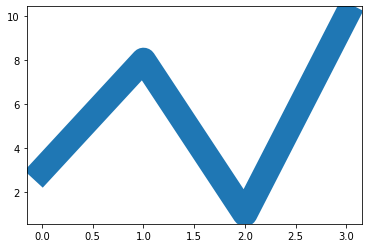

In [37]:
plt.plot(ypoints, lw='25')
plt.show()

## Plot Title, Labels and Grid

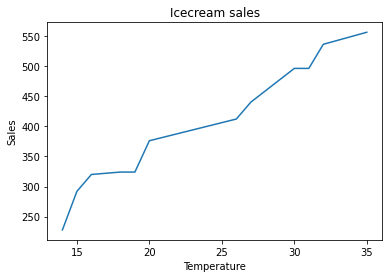

In [38]:
x = np.array([14, 16, 18, 19, 26, 30, 32, 35, 31, 27, 20, 15])
x.sort()
y = np.array([292, 228, 324, 376, 440, 496, 536, 556, 496, 412, 324, 320])
y.sort()
plt.plot(x, y)

plt.title("Icecream sales")
plt.xlabel("Temperature")
plt.ylabel("Sales")

plt.show()

**Title position**

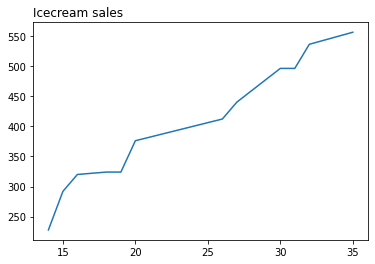

In [39]:
# loc values: 'left', 'right', and 'center'
# Default value is 'center'.
plt.plot(x, y)

plt.title("Icecream sales", loc="left")
plt.show()

**Font properties**

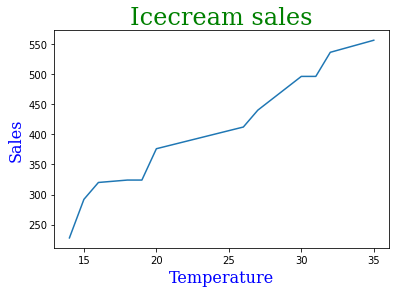

In [40]:
font1 = {'family':'serif','color':'green','size':24}
font2 = {'family':'serif','color':'blue','size':16}

plt.title("Icecream sales", fontdict = font1)
plt.xlabel("Temperature", fontdict = font2)
plt.ylabel("Sales", fontdict = font2)

plt.plot(x, y)
plt.show()

**Grid**

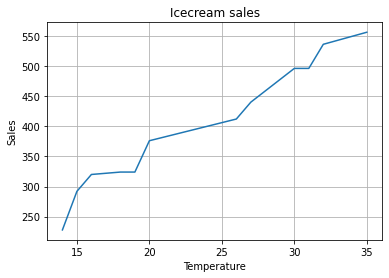

In [41]:
plt.plot(x, y)

plt.title("Icecream sales")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.grid()
plt.show()

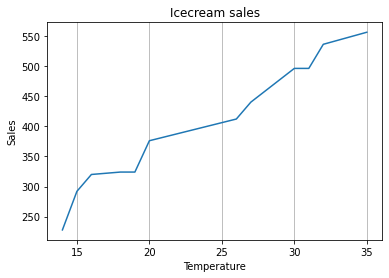

In [42]:
# axis can be 'x', 'y', and 'both'. 
# Default value is 'both'.

plt.plot(x, y)
plt.title("Icecream sales")
plt.xlabel("Temperature")
plt.ylabel("Sales")

plt.grid(axis = 'x')

plt.show()

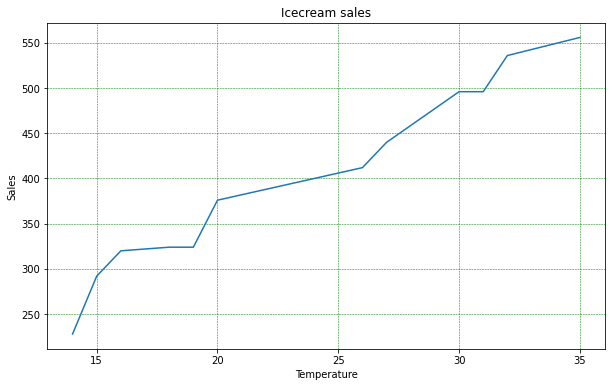

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Icecream sales")
plt.xlabel("Temperature")
plt.ylabel("Sales")

plt.grid(color = 'green', ls='--', lw=0.5)
plt.show()

**<p style="color:red">EXERCISE 2</p>**

**Create a line chart to plot the icescream sales in 2 different regions according to temperature. The data for the first region (say Cluj) is the same as above. The data for the second region (say Sibiu) will contain random values in the interval [200, 700].**
* The plot shows 2 lines in colors magenta and blue corresponding to the sales in the 2 regions.
* The plot has a title: "Icescream sales in Cluj vs Sibiu" based on user-defined font.
* The plot has x and y labels.
* The plot has a grid that uses a dotted linestyle, brown color and a line width of 0.75.
* The plot has a legend for the two lines displayed: 'Cluj Sales' and 'Sibiu Sales'.
* The plot has a custom bacground color (choose one from here: https://matplotlib.org/stable/tutorials/colors/colors.html)
* Make different changes to the plot to improve its appearance.

In [44]:
# Your solution here...



## Matplotlib and DataFrames

First, let's plot the data from a simple dataframe.

In [19]:
data = {'India': [8880, 8670, 8147, 7338, 5704],
        'China': [5123, 6682, 3308, 1863, 1527]}

df = pd.DataFrame(data, index=['1980', 
                               '1981', 
                               '1982',
                               '1983',
                               '1984'])
  
# print the data
df

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


<AxesSubplot:>

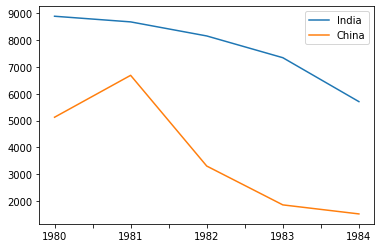

In [46]:
df.plot()

<AxesSubplot:>

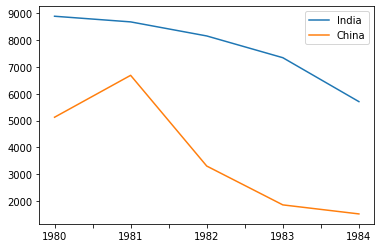

In [47]:
df.plot(kind="line")

<AxesSubplot:>

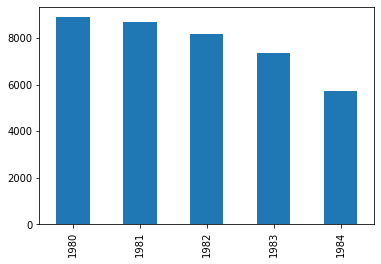

In [48]:
df['India'].plot(kind="bar")

***

**The Sales Dataset**

In [20]:
df = pd.read_csv('Sales.csv')
df

,Temperature,Sales
0,14,292
1,16,228
2,18,324
3,19,376
4,26,440
5,30,496
6,32,536
7,35,556
8,31,496
9,27,412


In [21]:
df = df.sort_values(by='Temperature')
df

,Temperature,Sales
0,14,292
11,15,320
1,16,228
2,18,324
3,19,376
10,20,324
4,26,440
9,27,412
5,30,496
8,31,496


<AxesSubplot:>

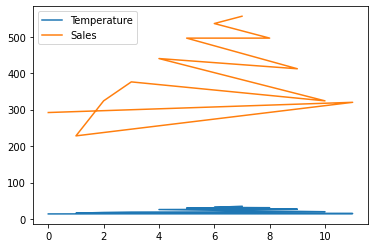

In [22]:
df.plot()

This is not what we wanted!

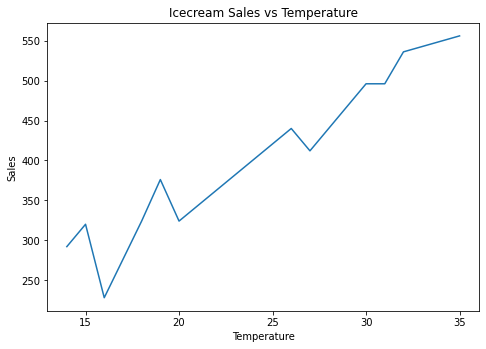

In [23]:
np_arr = df.values
x = np_arr[:, 0]
y = np_arr[:, 1]

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Icecream Sales vs Temperature')
ax.set_xlabel('Temperature')
ax.set_ylabel('Sales')
ax.plot(x, y)

Text(25, 530, 'Good Month')

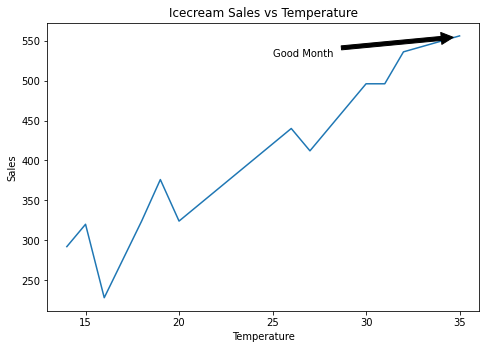

In [24]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Icecream Sales vs Temperature')
ax.set_xlabel('Temperature')
ax.set_ylabel('Sales')
ax.plot(x, y)

# Add Annotations by supplying the x & y to point at and the position of the text
# The lower left corner is at 0,0
ax.annotate('Good Month', xy=(35, 555), xytext=(25, 530), arrowprops=dict(facecolor='black', shrink=0.05))

<BarContainer object of 12 artists>

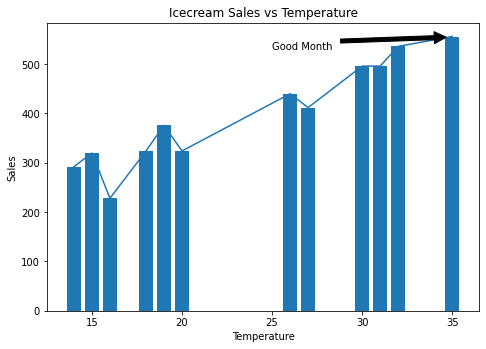

In [54]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Icecream Sales vs Temperature')
ax.set_xlabel('Temperature')
ax.set_ylabel('Sales')
ax.plot(x, y)
ax.annotate('Good Month', xy=(35, 555), xytext=(25, 530), arrowprops=dict(facecolor='black', shrink=0.05))

plt.bar(x,y)

### TeX Markup

* *You can use a subset of TeX markup in any Matplotlib text string by placing it inside a pair of dollar signs ($)*
* https://matplotlib.org/stable/tutorials/text/mathtext.html

Text(20, 500, '$\\sum_{i=0}^\\infty x_i \\to ?$')

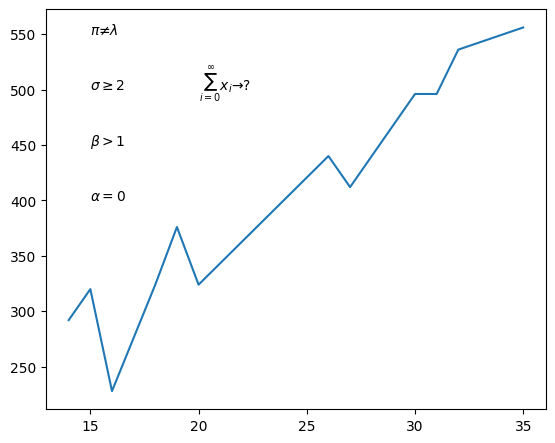

In [55]:
fig = plt.figure(figsize=(5,4), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(x, y)

ax.text(15, 400, r'$\alpha = 0$')
ax.text(15, 450, r'$\beta > 1$')
ax.text(15, 500, r'$\sigma \geq 2$')
ax.text(15, 550, r'$\pi \ne \lambda$')
ax.text(20, 500, r'$\sum_{i=0}^\infty x_i \to ?$')

***

**The GOOG dataset**

Get data from: https://finance.yahoo.com/quote/GOOG/history?p=GOOG

In [25]:
df_goog = pd.read_csv("data\GOOG.csv")
df_goog

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...,...
85,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300
86,2023-05-08,105.794998,108.419998,105.790001,108.239998,108.239998,17266000
87,2023-05-09,108.779999,110.595001,107.724998,107.940002,107.940002,24782400
88,2023-05-10,108.550003,113.510002,108.480003,112.279999,112.279999,47533500


In [26]:
np_goog = df_goog.to_numpy()
close_price = np_goog[:, 4]

In [27]:
close_price

array([89.699997, 88.709999, 86.769997, 88.160004, 88.800003, 89.239998,
       92.260002, 91.910004, 92.800003, 92.160004, 91.779999, 93.910004,
       99.279999, 101.209999, 99.209999, 96.730003, 99.160004, 100.709999,
       97.949997, 99.870003, 101.43, 108.800003, 105.220001, 103.470001,
       108.040001, 100.0, 95.459999, 94.860001, 95.0, 94.949997,
       97.099998, 95.779999, 94.589996, 92.050003, 91.800003, 91.07,
       89.349998, 90.099998, 90.300003, 90.510002, 92.309998, 94.019997,
       95.580002, 94.169998, 94.650002, 92.660004, 91.010002, 91.660004,
       94.25, 96.550003, 101.07, 102.459999, 101.93, 105.839996,
       104.220001, 106.260002, 106.059998, 103.059998, 101.360001,
       101.900002, 101.32, 104.0, 104.910004, 105.120003, 104.949997,
       108.900002, 106.949997, 106.120003, 105.220001, 108.190002,
       109.459999, 106.419998, 105.120003, 105.019997, 105.900002,
       105.910004, 106.779999, 104.610001, 104.449997, 108.370003,
       108.220001, 107.

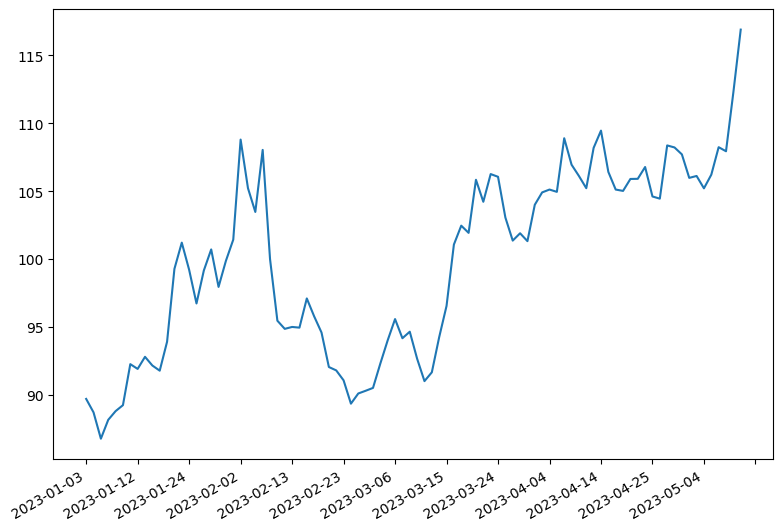

In [31]:
#import datetime
#holidays = [datetime.datetime(2023,4,17), datetime.datetime(2023,5,1)]
#date_arr = pd.bdate_range(start='3/1/2023', end='10/5/2023', freq='C', holidays=holidays)
#date_arr_np = date_arr.to_numpy()

date = np_goog[:, 0]
cp = np_goog[:, 4]

fig = plt.figure(figsize=(8,5), dpi=100)
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
# Tell matplotlib to interpret the x-axis values as dates
axes.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.plot(date, cp)

import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(7)
axes.xaxis.set_major_locator(myLocator)

**<p style="color:red">EXERCISE 3</p>**

**Create a line chart to plot the icescream sales from the Sales dataset. Add a second axes with a line chart showing the sales for temepratures above 20 (after position 5 in the sorted values).**
* Using TeX markup, add an equation to the plot that uses fractions, radicals, sin/cos, mathematical operators, greek letters.
* Add a text to the plot above the equation with the message "Equation:".
* The main line plot should have: dashed line style, line width 3, line color black, background color aquamarine, plot title with 24pt font and purple color, x and y labels of 14pt and red color.
* Add a second axes as mini-plot inside the main line plot showing the sales for temperatures above 20. The mini-plot should have a title, grid, background color, line style solid and line color black.

In [60]:
# Your solution here...



## The Canada Immigration dataset

This dataset contains annual data on the flows of international immigrants (from 45 countries) to Canada. 

Dataset: [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows).


The Canada Immigration dataset is available <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01">here</a>.

Examples below are based on the courses available here: https://cognitiveclass.ai/courses

In [32]:
df = pd.read_excel("data/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


View the bottom 5 rows of the dataset using the `tail()` function:

In [33]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


Get basic information about the dataframe using the `info()` method:

In [34]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


Get the dimensions of the dataframe using the `shape` instance variable:

In [35]:
# size of dataframe (rows, columns)
df.shape    

(195, 43)

In [36]:
# select a row by index
df.iloc[1]

Type               Immigrants
Coverage           Foreigners
OdName                Albania
AREA                      908
AreaName               Europe
REG                       925
RegName       Southern Europe
DEV                       901
DevName     Developed regions
1980                        1
1981                        0
1982                        0
1983                        0
1984                        0
1985                        0
1986                        1
1987                        2
1988                        2
1989                        3
1990                        3
1991                       21
1992                       56
1993                       96
1994                       71
1995                       63
1996                      113
1997                      307
1998                      574
1999                     1264
2000                     1816
2001                     1602
2002                     1021
2003                      853
2004      

Get the list of column headers using the dataframe's `columns` instance variable:

In [37]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [38]:
df['OdName']  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: OdName, Length: 195, dtype: object

In [39]:
df.loc[df['OdName']=='Romania']

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
142,Immigrants,Foreigners,Romania,908,Europe,923,Eastern Europe,901,Developed regions,375,...,5755,5048,4468,3834,2837,2076,1922,1776,1588,1512


In [40]:
df.iloc[142]

Type               Immigrants
Coverage           Foreigners
OdName                Romania
AREA                      908
AreaName               Europe
REG                       923
RegName        Eastern Europe
DEV                       901
DevName     Developed regions
1980                      375
1981                      438
1982                      583
1983                      543
1984                      524
1985                      604
1986                      656
1987                     1202
1988                     1106
1989                     1582
1990                     2252
1991                     2337
1992                     3147
1993                     3676
1994                     3495
1995                     4279
1996                     3909
1997                     3993
1998                     3033
1999                     3538
2000                     4539
2001                     5652
2002                     5765
2003                     5541
2004      

Get the list of indices using the `.index` instance variables:

In [41]:
df.index

RangeIndex(start=0, stop=195, step=1)

**Note:** The default type of instance variables `index` and `columns` are NOT `list`.

In [42]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [43]:
df.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

### Dataset Processing (clean the data, understand the dataset)

Clean the dataset by removing a few unnecessary columns, changing the names of some other columns and adding new columns.

**Remove columns**

In [44]:
# remove some columns
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [45]:
df.shape

(195, 38)

**Rename columns**

In [46]:
# rename the 'OdName' column to 'Country' 
df.rename(columns = {"OdName": "Country"}, inplace=True)

# rename some other columns
df.rename(columns={'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

**Add columns**

In [47]:
# add an extra column with the total no of immiggrants per country
df['Total'] = df.sum(axis=1, numeric_only=True)

df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


**Set index**

In [48]:
# make Country the index
# df.set_index("Country", inplace=True)

**Convert column names to strings**

In [49]:
# convert the column names into strings: '1980' to '2013'
# df.columns = list(map(str, df.columns))

**Dataset summary**

In [50]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


**Column Selection**

Select a column:

```python
    df.column_name               # returns series
```


In [51]:
# for columns that do not have spaces in the name
df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Select a column or multiple columns:

```python
    df['column']                  # returns series
```

```python
    df[['column 1', 'column 2']]  # returns dataframe
```


In [81]:
df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [52]:
# select several columns; note that some columns are strings while other are numbers
df[['Country', 1980, 1981, 1982, 1983, 1984, 1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


**Row Selection**

To select a row:
```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```

The default index of the dataset is a numeric range from 0 to 194. This makes it difficult to do a query by a specific country. 

This is why it is needed to set the index using `set_index()` method, in our case to the 'Country' column.

To reset the index, the method `df.reset_index()` can be used.

In [53]:
df.set_index("Country", inplace=True)

In [54]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [55]:
df.loc['Romania']

Continent               Europe
Region          Eastern Europe
DevName      Developed regions
1980                       375
1981                       438
1982                       583
1983                       543
1984                       524
1985                       604
1986                       656
1987                      1202
1988                      1106
1989                      1582
1990                      2252
1991                      2337
1992                      3147
1993                      3676
1994                      3495
1995                      4279
1996                      3909
1997                      3993
1998                      3033
1999                      3538
2000                      4539
2001                      5652
2002                      5765
2003                      5541
2004                      5755
2005                      5048
2006                      4468
2007                      3834
2008                      2837
2009    

In [56]:
df.loc['Romania']['Total']

93585

In [57]:
df[df.index == 'Romania']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585


In [88]:
df.loc['Romania', 2013]

1512

In [89]:
df.loc['Romania', [2010, 2011, 2012, 2013]]

2010    1922
2011    1776
2012    1588
2013    1512
Name: Romania, dtype: object

In [90]:
df.iloc[142, [33, 34, 35, 36]]

2010    1922
2011    1776
2012    1588
2013    1512
Name: Romania, dtype: object

In [65]:
# convert the column names into strings: '1980' to '2013'
df.columns = list(map(str, df.columns))

In [92]:
#[print(type(x)) for x in df.columns.values]

**Filtering the data**

In [58]:
condition = df['Continent'] == 'Europe'
print(condition)

Country
Afghanistan       False
Albania            True
Algeria           False
American Samoa    False
Andorra            True
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [59]:
#pass the condition into the dataFrame
df[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Austria,Europe,Western Europe,Developed regions,234,238,201,117,127,165,196,...,122,102,98,91,109,124,84,102,90,4985
Belarus,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,558,439,568,524,454,438,357,277,247,7975
Belgium,Europe,Western Europe,Developed regions,511,540,519,297,183,181,197,...,400,302,363,335,358,363,332,402,379,10762
Bosnia and Herzegovina,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,211,217,209,182,156,168,140,121,119,21855
Bulgaria,Europe,Eastern Europe,Developed regions,24,20,12,33,11,24,33,...,1738,1419,1172,994,784,556,365,451,512,23310
Croatia,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,0,...,128,102,102,131,92,91,135,112,125,8001
Czech Republic,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,193,146,137,104,159,168,128,173,174,4192


In [60]:
# passing multiple criteria in the same line
# pandas requires '&', '|' instead of 'and', 'or'
df[(df['Continent']=='Europe') & (df['Region']=='Eastern Europe')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,558,439,568,524,454,438,357,277,247,7975
Bulgaria,Europe,Eastern Europe,Developed regions,24,20,12,33,11,24,33,...,1738,1419,1172,994,784,556,365,451,512,23310
Czech Republic,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,193,146,137,104,159,168,128,173,174,4192
Hungary,Europe,Eastern Europe,Developed regions,205,310,397,337,310,522,647,...,516,520,425,383,312,354,287,300,425,16822
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241
Republic of Moldova,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,655,803,1099,1127,1535,1988,1367,1416,1231,15381
Romania,Europe,Eastern Europe,Developed regions,375,438,583,543,524,604,656,...,5048,4468,3834,2837,2076,1922,1776,1588,1512,93585
Russian Federation,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,3972,3117,2983,2690,2931,2288,1963,2079,2466,63344
Slovakia,Europe,Eastern Europe,Developed regions,0,0,0,0,0,0,0,...,369,241,215,125,128,135,134,136,105,5963


In [61]:
df.head(2)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


### Line Plots for this dataframe

Let's plot a line graph of immigration from Haiti using `df.plot()`.



In [63]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [64]:
df.loc['Haiti']

Continent    Latin America and the Caribbean
Region                             Caribbean
DevName                   Developing regions
1980                                    1666
1981                                    3692
1982                                    3498
1983                                    2860
1984                                    1418
1985                                    1321
1986                                    1753
1987                                    2132
1988                                    1829
1989                                    2377
1990                                    2379
1991                                    2829
1992                                    2399
1993                                    3655
1994                                    2100
1995                                    2014
1996                                    1955
1997                                    1645
1998                                    1295
1999      

In [66]:
years = list(map(str, range(1980, 2014)))

haiti = df.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
# haiti is a series
print(type(haiti))
haiti.head()

<class 'pandas.core.series.Series'>


1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

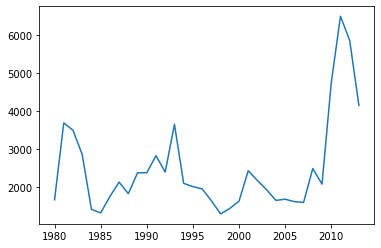

In [98]:
haiti.plot()

Note: In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life. About three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. https://en.wikipedia.org/wiki/2010_Haiti_earthquake

**MPL Styles**

In [67]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [68]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

<AxesSubplot:>

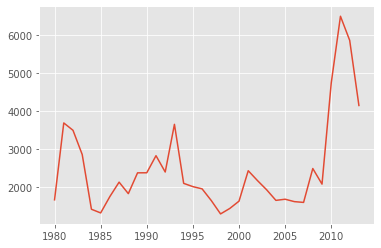

In [69]:
haiti.plot()

In [70]:
mpl.style.use('default')

<AxesSubplot:>

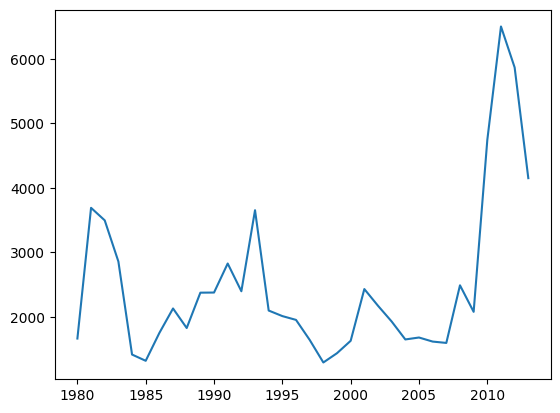

In [71]:
haiti.plot()

In [72]:
mpl.style.use(['ggplot'])

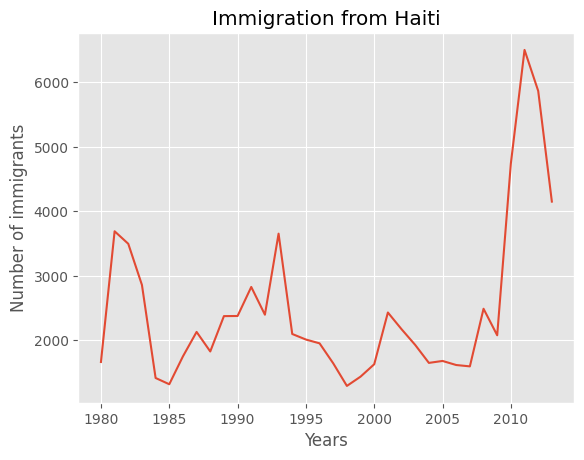

In [73]:
# change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

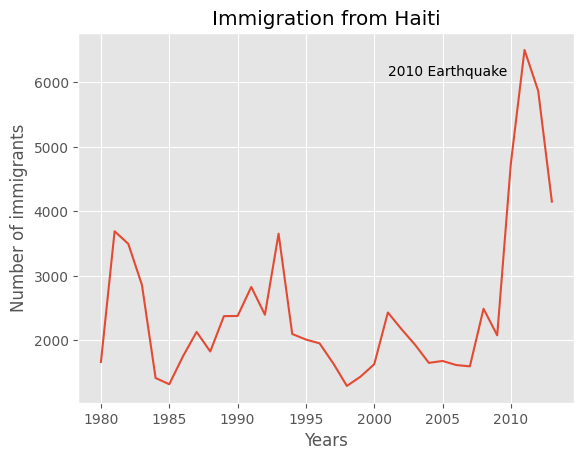

In [106]:
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake
plt.text(2001, 6100, '2010 Earthquake') # see note below

plt.show()

About the x and y values in `plt.text(x, y, label)`:

```
 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
```

```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```

```
If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```

```python
    plt.text(20, 6000, '2010 Earthquake')
```

**<p style="color:red">EXERCISE 4</p>**

**Plot a line chart with the number of immigrants from Romania to Canada.**
* Use the 'seaborn' mpl style.
* Make sure that the line style is dashed and the line color is green.

In [107]:
# Your solution here...



#### Compare the number of immigrants from India and China

In [74]:
years = list(map(str, range(1980, 2014)))
ci = df.loc[['India', 'China'], years]
ci.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


<AxesSubplot:xlabel='Country'>

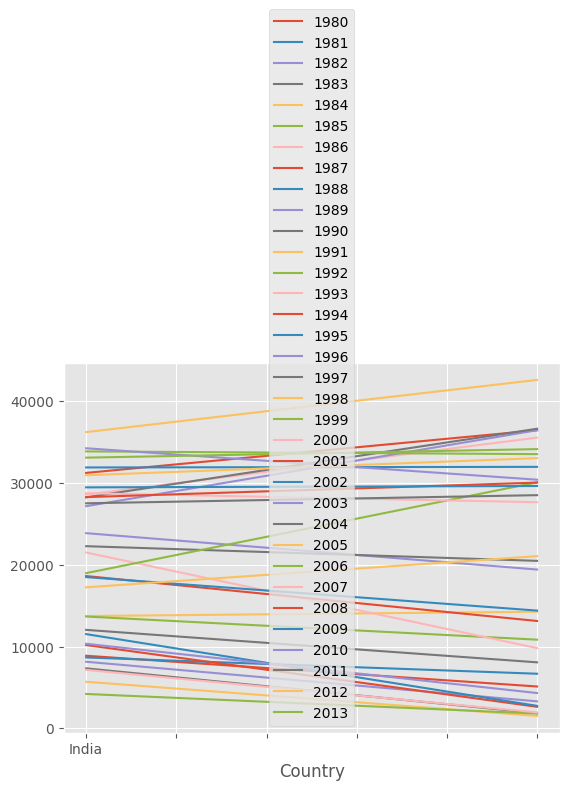

In [75]:
ci.plot()

Note: *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. 


In [76]:
type(ci)

pandas.core.frame.DataFrame

**Swap rows and columns using transpose()**

In [77]:
ci = ci.transpose()
ci.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


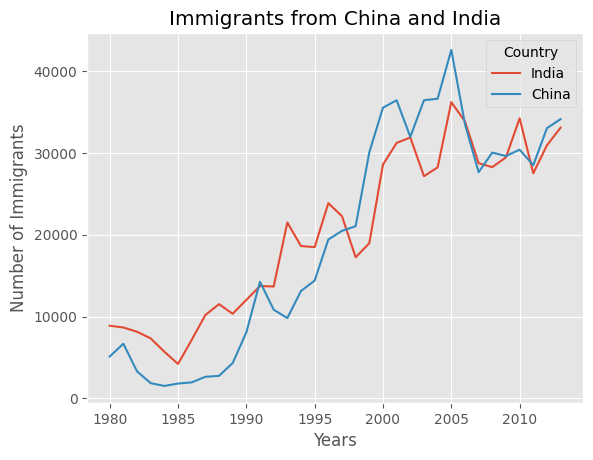

In [78]:
mpl.style.use(['ggplot'])

ci.index = ci.index.map(int)
ci.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

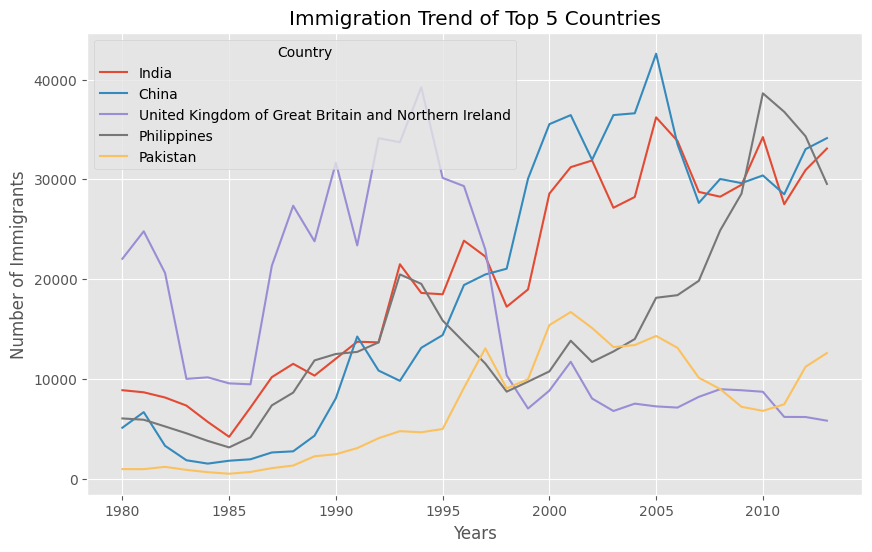

In [113]:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df5 = df.head(5)

# transpose the dataframe
df5 = df5[years].transpose() 

df5.index = df5.index.map(int)
df5.plot(kind='line', figsize=(10, 6))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Other types of plots

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot

**<p style="color:red">EXERCISE 5</p>**

**Plot a line chart to compare the number of immigrants from Romania, Bulgaria and Hungary to Canada for the period 1990-2013.**
* Use the 'default' mpl style.
* The line color for Romania should be red.
* The line color for Bulgaria should be blue.
* The line color for Hungary should be green.
* The line style is dashes for all three lines.
* The line width is 1.5 for all three lines.
* All three lines should have markers.
* The grid lines should have color black and the following style: '-.-'.
* The background color of the plot should be 'lavender'.
* The legend should be placed outside the plot.

In [114]:
# Your solution here...

